In [1]:
import sys
import numpy as np
from matplotlib import pyplot as plt
from astropy.cosmology import Planck13


sys.path.append('../')

from BGS import BGS
from FileEmcee import FileEmcee
from EmceeRun import EmceeRun
from Plotter import Plotter
from VMaxDensity import VmaxDensity
from ZSchechterModel import ZSchechterModel

In [2]:
bgs = BGS('BGS_ANY_full.provabgs.lite.hdf5', is_bgs_bright=True)
emcee_file = FileEmcee(z_dependence=True, bin_test=True, info_file='0.01_0.4')
emcee_run = EmceeRun(emcee_file)

emcee_run.set_best_params(discard=150)
best_params = emcee_run.get_best_params()

plotter = Plotter(bgs, emcee_run)
vmax_hist = VmaxDensity(bgs.file, is_bgs_bright=True)

In [3]:
# moustakas+(2013)
# logM* is in Msun/h70^2
# Phi is in Mpc^3/h70^3
m13_logms = np.linspace(9., 12., 31) + np.log10(0.7**2)
m13_logsmf = np.array([-1.899, -1.923, -1.970, -2.031, -2.055, -2.106, -2.144, 
                       -2.179, -2.188, -2.216, -2.234, -2.236, -2.262, -2.252,
                       -2.285, -2.317, -2.365, -2.419, -2.504, -2.607, -2.728,
                       -2.888, -3.104, -3.332, -3.606, -3.953, -4.363, -4.778, -5.255, -5.87, -6.49])
m13_logsmf -= np.log10((Planck13.H0.value / 70)**3)
m13_logsmf_sig = np.array([0.052, 0.048, 0.059, 0.052, 0.050, 0.053, 0.046, 0.051,
                           0.046, 0.048, 0.047, 0.045, 0.046, 0.049, 0.045, 0.046,
                           0.049, 0.049, 0.047, 0.046, 0.046, 0.043, 0.041, 0.042,
                           0.042, 0.047, 0.050, 0.057, 0.066, 0.1, 0.2])

In [4]:
# driver+(2022) GAMA 
# logM* is in Msun/h70^2
# Phi is in Mpc^3/h70^3
d22_logms = np.linspace(6.875, 11.625, 20) + np.log10(0.7**2)
d22_logsmf = np.array([-0.691, -1.084, -1.011, -1.349, -1.287, -1.544, -1.669, -1.688, -1.795, -1.886, 
                       -2.055, -2.142, -2.219, -2.274, -2.292, -2.361, -2.561, -2.922, -3.414, -4.704])# + 0.0807
#d22_logsmf -= np.log10((Planck13.H0.value / 70)**3)
d22_logsmf_sig = np.array([0.176, 0.125, 0.071, 0.092, 0.079, 0.071, 0.045, 0.032, 0.024, 0.020, 0.014, 0.010, 
                          0.009, 0.009, 0.009, 0.010, 0.013, 0.019, 0.032, 0.138])

In [5]:
# bernardi+(2018)
b18_logms = np.linspace(9.05, 12.15, 32) + np.log10(0.7**2)
b18_logsmf = np.array([-2.051, -2.075, -2.092, -2.089, -2.118, -2.159, -2.183, -2.208, -2.213, -2.231, 
                      -2.252, -2.240, -2.252, -2.250, -2.274, -2.314, -2.357, -2.421, -2.504, -2.611, 
                       -2.732, -2.885, -3.055, -3.252, -3.472, -3.715, -3.950, -4.254, -4.554, -4.881,
                       -5.321, -5.742])

/Users/federico/Library/CloudStorage/OneDrive-UniversityCollegeLondon/PhD/PhD_project/bgs_psmf/paper/../VMaxDensity.py:19: RuntimeWarning: divide by zero encountered in divide
  _w = self.w_spec / (self.vmax.clip(v_zmin, v_zmax) - v_zmin)


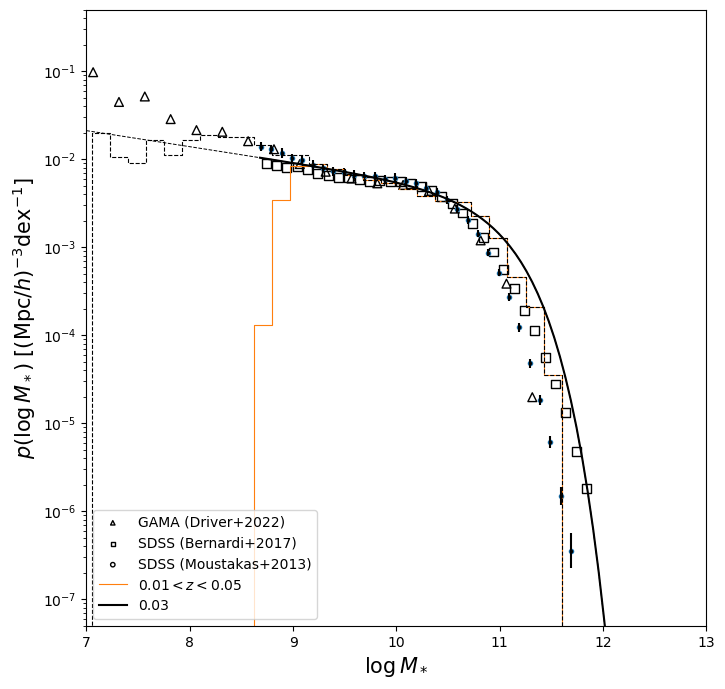

In [6]:
zmin, zmax, z0 = 0.01, 0.05, 0.03

plot_params_ext = {'color': 'black', 'linestyle':'--', 'linewidth':0.7}
plot_params = {'color':'black', 'linestyle':'-', 'label':f'{z0:.2f}'}


x_lin_ext = np.linspace(7, 14, 100)

plt.figure(figsize=(8,8))
plt.plot(m13_logms, 10**m13_logsmf,'o', markersize=3)
plt.errorbar(m13_logms, 10**m13_logsmf, 
             yerr=[10**m13_logsmf - 10**(m13_logsmf - m13_logsmf_sig), 10**(m13_logsmf + m13_logsmf_sig) - 10**m13_logsmf],
             fmt='.k', markersize=3)
plt.scatter(d22_logms, 10**d22_logsmf, marker='^', s=40, facecolor='none', edgecolor='k')
plt.scatter(b18_logms, 10**b18_logsmf, marker='s', s=40, facecolor='none', edgecolor='k')

plt.scatter([], [], marker='^', s=10, facecolor='none', edgecolor='k', label='GAMA (Driver+2022)')
plt.scatter([], [], marker='s', s=10, facecolor='none', edgecolor='k', label='SDSS (Bernardi+2017)')
plt.scatter([], [], marker='o', s=10, facecolor='none', edgecolor='k', label='SDSS (Moustakas+2013)')

h, b, _h, _b = vmax_hist.histogram_norm(zmin, zmax, bins=40)
z_smf = ZSchechterModel(bgs, zmin, zmax, z0)

n = z_smf.normalisation(best_params, nbin=40)


x_lin = np.linspace(z_smf.mlim.min(), 14, 100)

plotter.plot_vmax_hist(h, b, _h, _b, **{'label':f'${zmin:.2f}< z <{zmax:.2f}$'})
Plotter.plot_zschechter(x_lin, z0, n, best_params, **plot_params)
Plotter.plot_zschechter(x_lin_ext, z0, n, best_params, **plot_params_ext)

plt.yscale('log')
plt.ylim(5e-8, 5e-1)
plt.legend(loc='lower left')

In [7]:
logms2030 = np.linspace(8.8, 11.3, 26)
m13_smf2030 = np.array([-2.009, -2.039, -2.160, -2.185, -2.078, -2.085, -2.142, -2.155, -2.124, -2.200,
                  -2.212, -2.242, -2.215, -2.320, -2.285, -2.330, -2.350, -2.380, -2.396, -2422,
                  -2.542, -2.642, -2.784, -2.83, -3.17, -3.54])

# m13_smf2030 -= np.log10(1e-4)

m13_smf2030_sig = np.array([0.20, 0.20, 0.10, 0.20, 0.10, 0.099, 0.089, 0.042, 0.045,
                      0.044, 0.040, 0.035, 0.052, 0.033, 0.073, 0.039, 0.039,
                      0.062, 0.067, 0.040, 0.033, 0.074, 0.10, 0.30, 0.073, 0.030]) 


logms3040 = np.linspace(9.2, 11.5, 24)
m13_smf3040 = np.array([-2.132, -2.210, -2.190, -2.183, -2.282, -2.258, -2.235, -2.241, -2.208,
                             -2.288, -2.241, -2.233, -2.290, -2.283, -2.332, -2.407, -2.472, -2.579,
                           -2.709, -2.819, -3.109, -3.34, -3.58, -4.34])

m13_smf3040_sig =[0.088, 0.080, 0.20, 0.20, 0.10, 0.094, 0.078, 0.080, 0.031, 0.071,
                     0.041, 0.017, 0.043, 0.050, 0.082, 0.060, 0.070, 0.083, 0.048, 0.037, 0.059, 0.090, 0.079, 0.044 ]

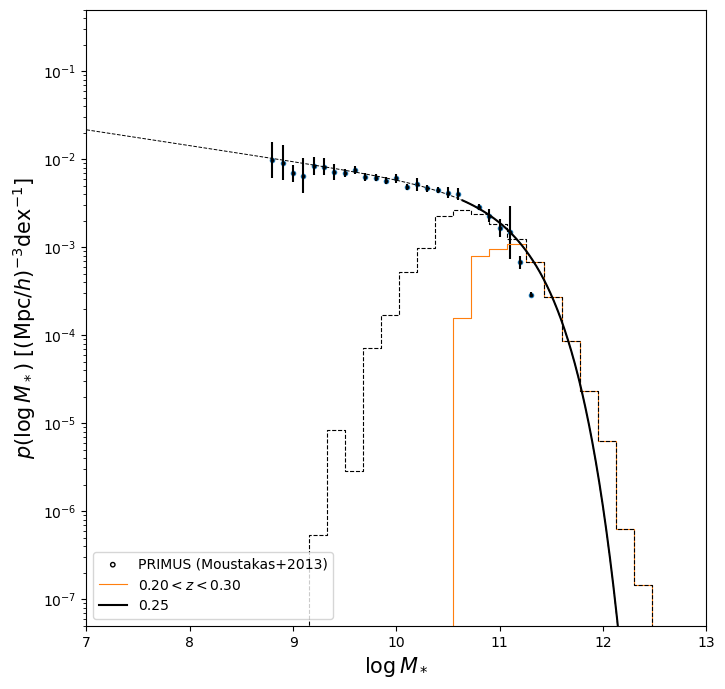

In [8]:
zmin, zmax, z0 = 0.2, 0.3, 0.25

plot_params_ext = {'color': 'black', 'linestyle':'--', 'linewidth':0.7}
plot_params = {'color':'black', 'linestyle':'-', 'label':f'{z0:.2f}'}


x_lin_ext = np.linspace(7, 14, 100)

plt.figure(figsize=(8,8))
plt.plot(logms2030, 10**m13_smf2030,'o', markersize=3)
plt.errorbar(logms2030, 10**m13_smf2030, 
             yerr=[10**m13_smf2030 - 10**(m13_smf2030 - m13_smf2030_sig), 10**(m13_smf2030 + m13_smf2030_sig) - 10**m13_smf2030],
             fmt='.k', markersize=3)

# plt.scatter(d22_logms, 10**d22_logsmf, marker='^', s=40, facecolor='none', edgecolor='k')
# plt.scatter(b18_logms, 10**b18_logsmf, marker='s', s=40, facecolor='none', edgecolor='k')

# plt.scatter([], [], marker='^', s=10, facecolor='none', edgecolor='k', label='GAMA (Driver+2022)')
# plt.scatter([], [], marker='s', s=10, facecolor='none', edgecolor='k', label='SDSS (Bernardi+2017)')
plt.scatter([], [], marker='o', s=10, facecolor='none', edgecolor='k', label='PRIMUS (Moustakas+2013)')

h, b, _h, _b = vmax_hist.histogram_norm(zmin, zmax, bins=40)
z_smf = ZSchechterModel(bgs, zmin, zmax, z0)

n = z_smf.normalisation(best_params, nbin=40)


x_lin = np.linspace(z_smf.mlim.min(), 14, 100)

plotter.plot_vmax_hist(h, b, _h, _b, **{'label':f'${zmin:.2f}< z <{zmax:.2f}$'})
Plotter.plot_zschechter(x_lin, z0, n, best_params, **plot_params)
Plotter.plot_zschechter(x_lin_ext, z0, n, best_params, **plot_params_ext)

plt.yscale('log')
plt.ylim(5e-8, 5e-1)
plt.legend(loc='lower left')

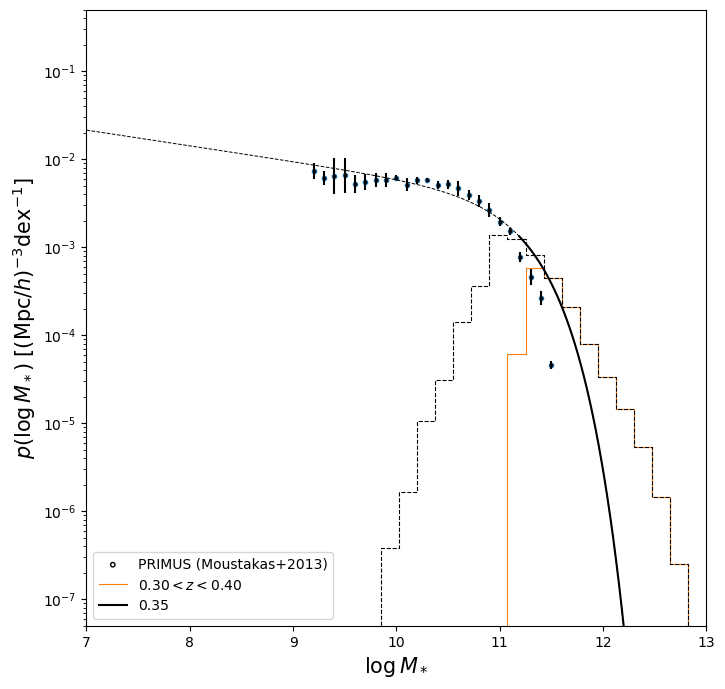

In [9]:
zmin, zmax, z0 = 0.3, 0.4, 0.35

plot_params_ext = {'color': 'black', 'linestyle':'--', 'linewidth':0.7}
plot_params = {'color':'black', 'linestyle':'-', 'label':f'{z0:.2f}'}


x_lin_ext = np.linspace(7, 14, 100)

plt.figure(figsize=(8,8))
plt.plot(logms3040, 10**m13_smf3040,'o', markersize=3)
plt.errorbar(logms3040, 10**m13_smf3040, 
             yerr=[10**m13_smf3040 - 10**(m13_smf3040 - m13_smf3040_sig), 10**(m13_smf3040 + m13_smf3040_sig) - 10**m13_smf3040],
             fmt='.k', markersize=3)

# plt.plot(logms2030, 10**m13_smf2030,'o', markersize=3)
# plt.errorbar(logms2030, 10**m13_smf2030, 
#              yerr=[10**m13_smf2030 - 10**(m13_smf2030 - m13_smf2030_sig), 10**(m13_smf2030 + m13_smf2030_sig) - 10**m13_smf2030],
#              fmt='.k', markersize=3)

# plt.scatter(d22_logms, 10**d22_logsmf, marker='^', s=40, facecolor='none', edgecolor='k')
# plt.scatter(b18_logms, 10**b18_logsmf, marker='s', s=40, facecolor='none', edgecolor='k')

# plt.scatter([], [], marker='^', s=10, facecolor='none', edgecolor='k', label='GAMA (Driver+2022)')
# plt.scatter([], [], marker='s', s=10, facecolor='none', edgecolor='k', label='SDSS (Bernardi+2017)')
plt.scatter([], [], marker='o', s=10, facecolor='none', edgecolor='k', label='PRIMUS (Moustakas+2013)')

h, b, _h, _b = vmax_hist.histogram_norm(zmin, zmax, bins=40)
z_smf = ZSchechterModel(bgs, zmin, zmax, z0)

n = z_smf.normalisation(best_params, nbin=40)


x_lin = np.linspace(z_smf.mlim.min(), 14, 100)

plotter.plot_vmax_hist(h, b, _h, _b, **{'label':f'${zmin:.2f}< z <{zmax:.2f}$'})
Plotter.plot_zschechter(x_lin, z0, n, best_params, **plot_params)
Plotter.plot_zschechter(x_lin_ext, z0, n, best_params, **plot_params_ext)

plt.yscale('log')
plt.ylim(5e-8, 5e-1)
plt.legend(loc='lower left')